In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import image

# Load CIFAR10
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Normalize (NO reshape needed)
x_train = x_train / 255.0
x_test  = x_test / 255.0

y_train = to_categorical(y_train, 10)
y_test  = to_categorical(y_test, 10)

# Build model (RGB input)
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.1)

model.save("cifar_model.h5")


c:\Users\negovin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 19s 25ms/step - accuracy: 0.4584 - loss: 1.5109 - val_accuracy: 0.5290 - val_loss: 1.3038
Epoch 2/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 18s 26ms/step - accuracy: 0.5940 - loss: 1.1572 - val_accuracy: 0.6248 - val_loss: 1.0741
Epoch 3/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 19s 27ms/step - accuracy: 0.6482 - loss: 1.0089 - val_accuracy: 0.6626 - val_loss: 0.9894
Epoch 4/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 12s 17ms/step - accuracy: 0.6767 - loss: 0.9258 - val_accuracy: 0.6826 - val_loss: 0.9245
Epoch 5/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 14s 19ms/step - accuracy: 0.7039 - loss: 0.8488 - val_accuracy: 0.6906 - val_loss: 0.9094
Epoch 6/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 12s 17ms/step - accuracy: 0.7273 - loss: 0.7803 - val_accuracy: 0.7054 - val_loss: 0.8727
Epoch 7/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - accuracy: 0.7492 - loss: 0.7236 - val_accuracy: 0.7002 - val_loss: 0.8808
Epoch 8/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - accuracy: 0.7659 - loss: 0.6709 - 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
Predicted: Horse
Confidence: 34.81%


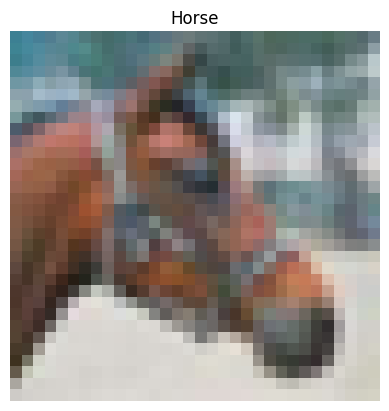

In [2]:
class_names = [
    "Airplane","Automobile","Bird","Cat","Deer",
    "Dog","Frog","Horse","Ship","Truck"
]

cifar_model = load_model("cifar_model.h5")

sample = x_test[17].reshape(1,32,32,3)
prediction = cifar_model.predict(sample)

pred_class = np.argmax(prediction)
confidence = np.max(prediction) * 100

print("Predicted:", class_names[pred_class])
print(f"Confidence: {confidence:.2f}%")

plt.imshow(x_test[17])
plt.title(class_names[pred_class])
plt.axis("off")
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


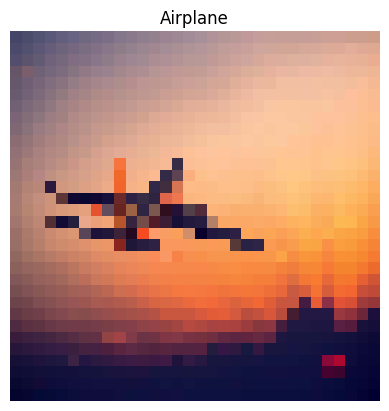

In [ ]:
img = image.load_img(
    "airplane.jpg",
    target_size=(32,32)
)

img_array = image.img_to_array(img) / 255.0
img_array = img_array.reshape(1,32,32,3)

prediction = cifar_model.predict(img_array)
pred_class = np.argmax(prediction)

plt.imshow(img)
plt.title(class_names[pred_class])
plt.axis("off")
plt.show()


c:\Users\negovin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
704/704 ━━━━━━━━━━━━━━━━━━━━ 14s 18ms/step - accuracy: 0.4052 - loss: 1.6013 - val_accuracy: 0.5372 - val_loss: 1.2832
Epoch 2/30
704/704 ━━━━━━━━━━━━━━━━━━━━ 17s 24ms/step - accuracy: 0.5698 - loss: 1.2027 - val_accuracy: 0.5786 - val_loss: 1.1609
Epoch 3/30
704/704 ━━━━━━━━━━━━━━━━━━━━ 14s 20ms/step - accuracy: 0.6345 - loss: 1.0321 - val_accuracy: 0.6460 - val_loss: 1.0122
Epoch 4/30
704/704 ━━━━━━━━━━━━━━━━━━━━ 18s 26ms/step - accuracy: 0.6809 - loss: 0.9044 - val_accuracy: 0.6726 - val_loss: 0.9293
Epoch 5/30
704/704 ━━━━━━━━━━━━━━━━━━━━ 18s 25ms/step - accuracy: 0.7192 - loss: 0.7995 - val_accuracy: 0.6960 - val_loss: 0.8617
Epoch 6/30
704/704 ━━━━━━━━━━━━━━━━━━━━ 20s 29ms/step - accuracy: 0.7460 - loss: 0.7251 - val_accuracy: 0.7020 - val_loss: 0.8616
Epoch 7/30
704/704 ━━━━━━━━━━━━━━━━━━━━ 19s 26ms/step - accuracy: 0.7684 - loss: 0.6594 - val_accuracy: 0.7064 - val_loss: 0.8436
Epoch 8/30
704/704 ━━━━━━━━━━━━━━━━━━━━ 19s 26ms/step - accuracy: 0.7907 - loss: 0.5982 - 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
Predicted: Horse
Confidence: 99.92%


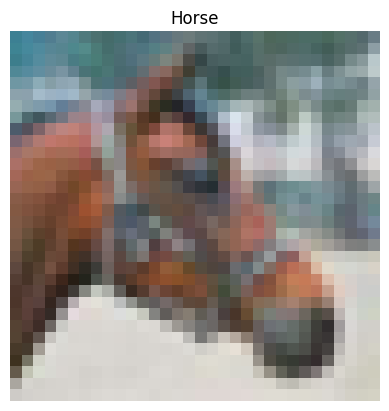

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


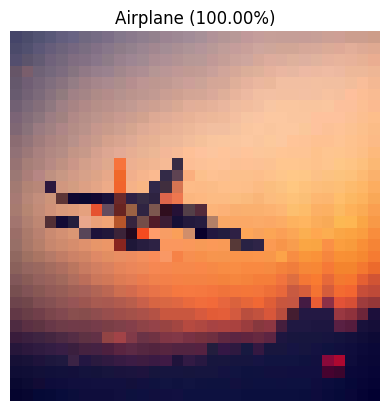

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import image

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Normalize images
x_train = x_train / 255.0
x_test  = x_test / 255.0

# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test  = to_categorical(y_test, 10)

# Build CNN model (RGB input)
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    # ➕ Added layer 1
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),

    Dense(256, activation='relu'),  # ➕ Added layer 2
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train model (epochs changed to 30)
history = model.fit(
    x_train, y_train,
    epochs=30,
    batch_size=64,
    validation_split=0.1
)

# Save model
model.save("cifar_model2.h5")

# Class names
class_names = [
    "Airplane","Automobile","Bird","Cat","Deer",
    "Dog","Frog","Horse","Ship","Truck"
]

# Load saved model
cifar_model = load_model("cifar_model2.h5")

# Predict using test sample
sample = x_test[17].reshape(1,32,32,3)
prediction = cifar_model.predict(sample)

pred_class = np.argmax(prediction)
confidence = np.max(prediction) * 100

print("Predicted:", class_names[pred_class])
print(f"Confidence: {confidence:.2f}%")

# Display test image
plt.imshow(x_test[17])
plt.title(class_names[pred_class])
plt.axis("off")
plt.show()

# Predict using external image
img = image.load_img(
    "airplane.jpg",
    target_size=(32,32)
)

img_array = image.img_to_array(img) / 255.0
img_array = img_array.reshape(1,32,32,3)

prediction = cifar_model.predict(img_array)
pred_class = np.argmax(prediction)
confidence = np.max(prediction) * 100

plt.imshow(img)
plt.title(f"{class_names[pred_class]} ({confidence:.2f}%)")
plt.axis("off")
plt.show()